# Preparação de estados mistos 

## Preparação de estados do tipo $X$ reais
Estados do tipo $X$ são estados de 2 qubits importantes para e.g. quantificação de emaranhamento. Estes estados tem a forma sugestiva
$$\rho_X = \begin{bmatrix} a&0&0&w \\ 0&b&z&0 \\ 0&z^*&c&0 \\ w^*&0&0&d \end{bmatrix},$$
com $d=1-a-b-c.$ Aqui consideraremos o caso de estados do tipo $X$ reais:
$$w,z\in\mathbb{R}.$$

Esta matrix densidade pode ser diagonalizada, resultando em
$$\rho_X = \sum_{j,k=0}^{1}p_{jk}|\Psi_{jk}\rangle\langle\Psi_{jk}|,$$
com
\begin{align}
& |\Psi_{00}\rangle = \cos\theta|00\rangle+\sin\theta|11\rangle, \\
& |\Psi_{01}\rangle = \sin\phi|01\rangle+\cos\phi|10\rangle, \\
& |\Psi_{11}\rangle = \cos\phi|01\rangle-\sin\phi|10\rangle, \\
& |\Psi_{10}\rangle = -\sin\theta|00\rangle+\cos\theta|11\rangle.
\end{align}

In [7]:
from sympy import *
init_printing(use_unicode=True)
%matplotlib inline

In [61]:
p00,p01,p10,p11 = symbols('p_{00} p_{01} p_{10} p_{11}')
th,ph = symbols('theta phi')
Psi00 = Matrix([[cos(th)],[0],[0],[sin(th)]])
Psi01 = Matrix([[0],[sin(ph)],[cos(ph)],[0]])
Psi11 = Matrix([[0],[cos(ph)],[-sin(ph)],[0]])
Psi10 = Matrix([[-sin(th)],[0],[0],[cos(th)]])
#Psi00, Psi00.T, Psi00*Psi00.T

In [47]:
rhoX = p00*Psi00*Psi00.T +  p01*Psi01*Psi01.T + p10*Psi10*Psi10.T + p11*Psi11*Psi11.T
simplify(rhoX)

⎡          2                2                                                 
⎢p_{00}⋅cos (θ) + p_{10}⋅sin (θ)                 0                            
⎢                                                                             
⎢                                                                             
⎢                                           2                2       (p_{01} -
⎢               0                 p_{01}⋅sin (φ) + p_{11}⋅cos (φ)    ─────────
⎢                                                                             
⎢                                                                             
⎢                                   (p_{01} - p_{11})⋅sin(2⋅φ)               2
⎢               0                   ──────────────────────────     p_{01}⋅cos 
⎢                                               2                             
⎢                                                                             
⎢  (p_{00} - p_{10})⋅sin(2⋅θ)                       

Outra forma de escrever este estado é 
$$4\rho_X = I\otimes I + c_{xx}X\otimes X + c_{yy}Y\otimes Y + c_{zz}Z\otimes Z + a_z Z\otimes I + b_z I\otimes Z,$$
com $c_{ss}=\langle S\otimes S\rangle_{\rho_X}$, $a_z = \langle Z\rangle_{\rho_X^A}$ e  $b_z = \langle Z\rangle_{\rho_X^B}$.

Se $a_z=b_z=0$, obtemos os estados Bell-diagonal:
$$4\rho_{bd} = I\otimes I + c_{xx}X\otimes X + c_{yy}Y\otimes Y + c_{zz}Z\otimes Z.$$
Qualque estado de 2 qubits com marginais maximamente mistos pode ser colocado na forma de $\rho_{bd}$ através de transformações unitárias locais.

In [62]:
def kp(x,y):
    return KroneckerProduct(x,y)
I = Matrix([[1,0],[0,1]])
Y = Matrix([[0,-1j],[1j,0]])
Y = Matrix([[0,1],[1,0]])
Z = Matrix([[1,0],[0,-1]])
cxx,cyy,czz,az,bz = symbols('c_{xx} c_{yy} c_{zz} a_{z} b_{z}')
rhoX = (1/4)*(kp(I,I) + cxx*kp(X,X) + cyy*kp(Y,Y) + czz*kp(Z,Z) + az*kp(Z,I) + bz*kp(I,Z))
simplify(rhoX)

⎡0.25⋅a_{z} + 0.25⋅b_{z} + 0.25⋅c_{zz} + 0.25                       0         
⎢                                                                             
⎢                     0                        0.25⋅a_{z} - 0.25⋅b_{z} - 0.25⋅
⎢                                                                             
⎢                     0                                 0.25⋅c_{xx} + 0.25⋅c_{
⎢                                                                             
⎣         0.25⋅c_{xx} + 0.25⋅c_{yy}                                 0         

                                     0                                  0.25⋅c
                                                                              
c_{zz} + 0.25            0.25⋅c_{xx} + 0.25⋅c_{yy}                            
                                                                              
yy}            -0.25⋅a_{z} + 0.25⋅b_{z} - 0.25⋅c_{zz} + 0.25                  
                                                   

O primeiro passo do algoritmo é codificar os autovalores, probabilidades, preparando o estado
$$|\Psi\rangle = \sum_{j,k=0}^{1}\sqrt{p_{jk}}|jk\rangle.$$
Note que para determinar a distribuição de probabilidades $\{p_{jk}\}$ precisamos de 3 números reais entre $0$ e $1$ de forma de $p_{00}+p_{01}+p_{10}+p_{11}=1.$ O circuito proposto na Ref. 3 para fazer isto é o seguinte. Começamos com os 2 qubits preparados no estado
$$|\Psi_0\rangle = |00\rangle.$$
Depois disso, se faz uso da rotação em torno de $y$:
$$R_y(\theta) = e^{-i\theta Y/2} = \cos(\theta/2)I - i\sin(\theta/2)Y.$$
Como $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$, teremos que
\begin{align}
& R_y(\theta)|0\rangle = \cos(\theta/2)|0\rangle + \sin(\theta/2)|1\rangle, \\
& R_y(\theta)|1\rangle = \cos(\theta/2)|1\rangle - \sin(\theta/2)|0\rangle.
\end{align}

<img src='fig_X_states_pjk.png' width='500'>

Seguindo o circuito quântico acima, primeiro criamos superposição
\begin{align}
|\Psi_1\rangle & = (R_y(\theta)\otimes I)|\Psi_0\rangle \\
& = R_y(\theta)|0\rangle\otimes I|0\rangle \\
& = \big(\cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle\big)|0\rangle.
\end{align}
Agora correlacionamos essa superposição
\begin{align}
|\Psi_2\rangle & = C_X^{0\rightarrow 1}|\Psi_1\rangle \\
& = C_X^{0\rightarrow 1}\big(\cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle\big)|0\rangle \\
& = \cos(\theta/2)|00\rangle+\sin(\theta/2)|11\rangle.
\end{align}

Seguindo, fazemos aparecer todos os valores de $j,k$ e os 2 parâmetros que faltam:
\begin{align}
|\Psi_3\rangle & = (R_y(\beta)\otimes R_y(\gamma))|\Psi_2\rangle \\
& = \cos(\theta/2)R_y(\beta)|0\rangle\otimes R_y(\gamma)|0\rangle+\sin(\theta/2)R_y(\beta)|1\rangle\otimes R_y(\gamma)|1\rangle \\
& = \cos(\theta/2)(\cos(\beta/2)|0\rangle + \sin(\beta/2)|1\rangle)\otimes(\cos(\gamma/2)|0\rangle + \sin(\gamma/2)|1\rangle) \\
&  + \sin(\theta/2)(\cos(\beta/2)|1\rangle - \sin(\beta/2)|0\rangle)\otimes(\cos(\gamma/2)|1\rangle - \sin(\gamma/2)|0\rangle) \\
& = \cos(\theta/2)\cos(\beta/2)\cos(\gamma/2)|00\rangle + \cos(\theta/2)\cos(\beta/2)\sin(\gamma/2)|01\rangle \\
& + \cos(\theta/2)\sin(\beta/2)\cos(\gamma/2)|10\rangle + \cos(\theta/2)\sin(\beta/2)\sin(\gamma/2)|11\rangle \\
& + \sin(\theta/2)\cos(\beta/2)\cos(\gamma/2)|11\rangle - \sin(\theta/2)\cos(\beta/2)\sin(\gamma/2)|10\rangle \\
& - \sin(\theta/2)\sin(\beta/2)\cos(\gamma/2)|01\rangle + \sin(\theta/2)\sin(\beta/2)\sin(\gamma/2)|00\rangle \\
& = \big(\cos(\theta/2)\cos(\beta/2)\cos(\gamma/2) + \sin(\theta/2)\sin(\beta/2)\sin(\gamma/2)\big)|00\rangle \\
& + \big(\cos(\theta/2)\cos(\beta/2)\sin(\gamma/2) - \sin(\theta/2)\sin(\beta/2)\cos(\gamma/2)\big)|01\rangle \\
& + \big(\cos(\theta/2)\sin(\beta/2)\cos(\gamma/2) - \sin(\theta/2)\cos(\beta/2)\sin(\gamma/2)\big)|10\rangle \\
& + \big(\cos(\theta/2)\sin(\beta/2)\sin(\gamma/2) + \sin(\theta/2)\cos(\beta/2)\cos(\gamma/2)\big)|11\rangle \\
& = c_{00}|00\rangle + c_{01}|01\rangle + c_{10}|10\rangle + c_{11}|11\rangle \\
& = \sqrt{p_{00}}|00\rangle + \sqrt{p_{01}}|01\rangle + \sqrt{p_{10}}|10\rangle + \sqrt{p_{11}}|11\rangle
\end{align}
com
\begin{align}
& \sqrt{p_{00}} = \cos(\theta/2)\cos(\beta/2)\cos(\gamma/2) + \sin(\theta/2)\sin(\beta/2)\sin(\gamma/2), \\
& \sqrt{p_{01}} = \cos(\theta/2)\cos(\beta/2)\sin(\gamma/2) - \sin(\theta/2)\sin(\beta/2)\cos(\gamma/2), \\
& \sqrt{p_{10}} = \cos(\theta/2)\sin(\beta/2)\cos(\gamma/2) - \sin(\theta/2)\cos(\beta/2)\sin(\gamma/2), \\
& \sqrt{p_{11}} = \cos(\theta/2)\sin(\beta/2)\sin(\gamma/2) + \sin(\theta/2)\cos(\beta/2)\cos(\gamma/2).
\end{align}

In [4]:
th,be,ga = symbols('theta beta gamma')
c00 = cos(th/2)*cos(be/2)*cos(ga/2) + sin(th/2)*sin(be/2)*sin(ga/2) 
c01 = cos(th/2)*cos(be/2)*sin(ga/2) - sin(th/2)*sin(be/2)*cos(ga/2)
c10 = cos(th/2)*sin(be/2)*cos(ga/2) - sin(th/2)*cos(be/2)*sin(ga/2)
c11 = cos(th/2)*sin(be/2)*sin(ga/2) + sin(th/2)*cos(be/2)*cos(ga/2)

In [7]:
simplify(c00**2 + c01**2 + c10**2 + c11**2) # ok!

1

Seguindo, queremos prepara um estado misto com os autovalores $\{p_{jk}\}$. Para isso, temos que correlacionar o estado já produzido com outros 2 qubits:
\begin{align}
|\Psi_4\rangle & = C_{X}^{0\rightarrow 2}C_{X}^{1\rightarrow 3}|\Psi_3\rangle|00\rangle \\
& = C_{X}^{0\rightarrow 2}C_{X}^{1\rightarrow 3}\big(\sqrt{p_{00}}|00\rangle + \sqrt{p_{01}}|01\rangle + \sqrt{p_{10}}|10\rangle + \sqrt{p_{11}}|11\rangle\big)|00\rangle \\
& = \sqrt{p_{00}}|00\rangle|00\rangle + \sqrt{p_{01}}|01\rangle|01\rangle + \sqrt{p_{10}}|10\rangle|10\rangle + \sqrt{p_{11}}|11\rangle|11\rangle.
\end{align}
Note que, neste ponto, se tomamos o traço parcial sobre os 2 primeiros qubits, os 2 últimos qubits já terão os autovalores certos, mas os autovetores ainda não, pois
$$Tr_{01}(|\Psi_4\rangle\langle\Psi_4) = \sum_{j,k=0}^{1}p_{jk}|jk\rangle\langle jk|.$$

Então o que nos falta é fazer uma transformação unitárioa $U$ nos qubits 2 e 3 tal que
$$|\psi_{jk}\rangle = U|jk\rangle.$$

Nesse caso mais simples, podemos montar $U$ como segue
\begin{align}
& U|00\rangle = |\psi_{00}\rangle \ \therefore\ \begin{bmatrix}\cos\theta & & & \\ 0 & & & \\ 0 & & &  \\ \sin\theta & & &  \end{bmatrix}\begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix} = \begin{bmatrix}\cos\theta \\ 0 \\ 0 \\ \sin\theta\end{bmatrix}, \\
& U|10\rangle = |\psi_{10}\rangle \ \therefore\ \begin{bmatrix} & & -\sin\theta &  \\  & & 0 &  \\  & & 0 &   \\ & & \cos\theta &   \end{bmatrix}\begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix} = \begin{bmatrix}-\sin\theta \\ 0 \\ 0 \\ \cos\theta\end{bmatrix}, \\
& U|01\rangle = |\psi_{01}\rangle \ \therefore\ \begin{bmatrix} & 0 & & \\  & \sin\phi & & \\ & \cos\phi & &  \\  & 0 & &  \end{bmatrix}\begin{bmatrix} 0\\ 1 \\ 0 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ \sin\phi \\ \cos\phi \\ 0\end{bmatrix}, \\
& U|11\rangle = |\psi_{11}\rangle \ \therefore\ \begin{bmatrix} & & & 0 \\  & & & \cos\phi \\ & & & -\sin\phi  \\  & & & 0  \end{bmatrix}\begin{bmatrix} 0\\ 0 \\ 0 \\ 1 \\ \end{bmatrix} = \begin{bmatrix}0 \\ \cos\phi \\ -\sin\phi \\ 0\end{bmatrix}.
\end{align}

Por conseguinte
$$U = \begin{bmatrix}\cos\theta & 0 & -\sin\theta & 0 \\ 0 & \sin\phi & 0 & \cos\phi \\ 0 & \cos\phi & 0 & -\sin\phi  \\ \sin\theta & 0 & \cos\theta & 0  \end{bmatrix}. $$

Os autores da Ref. 1 notaram que o circuito quântico da figura abaixo implementa essa transformação unitária.

<img src='fig_X_states_base.png' width='400'>

In [36]:
P0 = Matrix([[1,0],[0,0]])
P1 = Matrix([[0,0],[0,1]])
def Ry(th):
    return cos(th/2)*I - 1j*sin(th/2)*Y
def Cx_ab():
    return KroneckerProduct(P0,I) + KroneckerProduct(P1,X) 
def Cx_ba():
    return KroneckerProduct(I,P0) + KroneckerProduct(X,P1) 

In [45]:
MB = Cx_ab()*KroneckerProduct(Ry(th-ph),I)*Cx_ba()*KroneckerProduct(Ry(th+ph),I) # mudanca de base
simplify(MB)

⎡1.0⋅cos(θ)      0       -1.0⋅sin(θ)       0     ⎤
⎢                                                ⎥
⎢    0       1.0⋅sin(φ)       0       1.0⋅cos(φ) ⎥
⎢                                                ⎥
⎢    0       1.0⋅cos(φ)       0       -1.0⋅sin(φ)⎥
⎢                                                ⎥
⎣1.0⋅sin(θ)      0       1.0⋅cos(θ)        0     ⎦

## Preparando estado Bell-diagonal

Como o nome diz, estes operadores densidade são diagonais na base de Bell
\begin{align}
& |\Phi_\pm\rangle = 2^{-1/2}(|00\rangle\pm|11\rangle), \\
& |\Psi_\pm\rangle = 2^{-1/2}(|01\rangle\pm|10\rangle).
\end{align}
Essa base é obtida fazendo-se 
$$\theta=\phi=\frac{\pi}{4}$$
na equação acima para $U$.

## Preparando estados quaisquer de 2 qubits

No algoritmo que discutimos acima, a primeira parte, da preparação da distribuição de probabilidades, funciona do mesmo modo para qualquer estado de 2 qubits. Ou seja, podemos continuar usando $U_{p_{jk}}$ seguindo das 2 CNOTS para obter
$$|\Psi_4\rangle = \sum_{j,k=0}^{1}\sqrt{p_{jk}}|jk\rangle|jk\rangle.$$

O que nos falta obter é a transformação unitária $V$ que leva da base computacional de 2 qubits para uma base qualquer
$$|\xi_{jk}\rangle = V|jk\rangle.$$ 
Uma vez obtida $V$, aplicamos
\begin{align}
|\Psi_5\rangle & = (I\otimes I\otimes V)|\Psi_4\rangle \\
& = \sum_{j,k=0}^{1}\sqrt{p_{jk}}|jk\rangle\otimes V|jk\rangle \\
& = \sum_{j,k=0}^{1}\sqrt{p_{jk}}|jk\rangle\otimes |\xi_{jk}\rangle.
\end{align}

Com isso, obteremos
$$Tr_p(|\Psi_5\rangle\langle\Psi_5|) = \sum_{j,k=0}^{1}p_{jk}|\xi_{jk}\rangle\langle\xi_{jk}|.$$

O problema fica encontrar 
$$V=?,$$
o que é fácil. O mais difícil é encontrar a decomposição de $V$ em termos de portas lógicas de um conjunto básico.

# Usando o algoritmo de Kitaev

Pensando bem, a etapa de preparação dos autovalores do operador densidade, ou seja, da distribuição de probabilidades, é o mesmo que preparar um certo estado quântico real. Por exemplo, para estados de um qubit seria preparar
$$|\psi\rangle = c_0|0\rangle + c_1|1\rangle$$
com
$$c_0,c_1\in\mathbb{R}.$$
Para 2 qubits, teríamos que preparar
$$|\psi\rangle = c_{00}|00\rangle + c_{01}|01\rangle + c_{10}|10\rangle + c_{11}|11\rangle$$
com
$$c_{00},c_{01},c_{10},c_{11}\in\mathbb{R}.$$
A mesma ideia segue para mais qubits, ou para qudits codificados com qubits.

Portanto, essa etapa pode ser realizada de forma geral usando o algoritmo de preparação de estados de Kitaev (veja a ref. 2).

### 1 qubit

Considere que queremos preparar um estado misto de 1 qubit:
$$\rho = r_0|r_0\rangle\langle r_0| + r_1|r_1\rangle\langle r_1|.$$
Neste caso, para obter os autovalores, precisamos primeiro preparar o estado puro:
$$|\psi_{r1}\rangle = \sqrt{r_{0}}|0\rangle+\sqrt{r_{1}}|1\rangle,$$
o que é  feito usando
$$|\psi_{r1}\rangle = R_{y}(\theta)|0\rangle$$
com
$$\theta = 2\arccos(\sqrt{r_0}).$$
Com isso teremos o que segue
\begin{align}
& |00\rangle \xrightarrow[]{R_y^0(\theta)} \big(\cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle\big)|0\rangle \\
& \xrightarrow[]{C_X^{0\rightarrow 1}} \cos(\theta/2)|00\rangle+\sin(\theta/2)|11\rangle \\
& \xrightarrow[]{U^{1}} \cos(\theta/2)|0\rangle|r_0\rangle+\sin(\theta/2)|1\rangle|r_1\rangle \\
& \xrightarrow[]{Tr_p} \cos^2(\theta/2)|r_0\rangle\langle r_0|+\sin^2(\theta/2)|r_1\rangle\langle r_1|,
\end{align}
em que usamos $U$ tal que
$$|r_j\rangle = U|j\rangle,\ j=0,1.$$

In [24]:
from qiskit import *
import numpy as np
import math
import qiskit
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

ibmqfactory.load_account:WARNING:2023-03-15 17:37:57,828: Credentials are already in use. The existing account in the session will be replaced.


In [87]:
# retorna o circuito quantico que prepara um certo estado real de 1 qubit
# coef = array com os 2 coeficientes reais do estado na base computacional
def qc_psi_1qb_real(coef):
    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr, name='psir_1qb')
    th = 2*math.acos(np.abs(coef[0]))
    qc.ry(th, qr[0])
    return qc

[0.31622777 0.9486833 ]


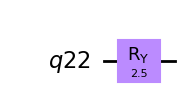

In [88]:
eigvals = [0.1,0.9]
coef = np.sqrt(eigvals)
print(coef)
qc_psi_1qb_real_ = qc_psi_1qb_real(coef)
qc_psi_1qb_real_.draw('mpl')

In [89]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_label('0')
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [90]:
sv = sv.evolve(qc_psi_1qb_real_)
sv

Statevector([0.31622777+0.j, 0.9486833 +0.j],
            dims=(2,))


### 2 qubits

Considere que queremos preparar um estado misto de 2 qubits:
$$\rho = r_{00}|r_{00}\rangle\langle r_{00}| + r_{01}|r_{01}\rangle\langle r_{01}| + r_{10}|r_{10}\rangle\langle r_{10}| + r_{11}|r_{11}\rangle\langle r_{11}|.$$

OBS. Estados de __1 qutrit__ podem ser preparados do mesmo modo, fazendo-se $r_{11}=0.$

Para obter os autovalores, precisamos primeiro preparar o estado puro real:
$$|\psi_{r2}\rangle = \sqrt{r_{00}}|00\rangle+\sqrt{r_{01}}|01\rangle+\sqrt{r_{10}}|10\rangle+\sqrt{r_{00}}|11\rangle.$$
Este estado pode ser preparado usando-se
$$|\psi\rangle = C_{R_{y}(\theta_0)}^{0_0\rightarrow 1}\big(|\psi_{r1}\rangle\otimes|0\rangle\big)$$
com
\begin{align}
& \theta_0 = 2\arctan(|\sqrt{r_{01}}|/|\sqrt{r_{00}}|), \\
& \theta_1 = 2\arctan(|\sqrt{r_{11}}|/|\sqrt{r_{10}}|), \\
& \xi = 2\arccos\sqrt{r_{00}+r_{01}}, \\
& |\psi_{r1}\rangle = \cos(\xi/2)|0\rangle+\sin(\xi/2)|1\rangle = \sqrt{r_{00}+r_{01}}|0\rangle+\sqrt{1-r_{00}-r_{01}}|1\rangle.
\end{align}

Com isso teremos o que segue
\begin{align}
& |00\rangle \xrightarrow[]{R_y^0(\xi)} \big(\cos(\xi/2)|0\rangle+\sin(\xi/2)|1\rangle\big)|0\rangle \\
& \xrightarrow[]{C_{R_{y}(\theta_0)}^{0_0 \rightarrow 1},C_{R_{y}(\theta_1)}^{0_1 \rightarrow 1}} \cos(\xi/2)|0\rangle\otimes R_{y}(\theta_0)|0\rangle+\sin(\xi/2)|1\rangle\otimes R_{y}(\theta_1)|1\rangle \\
& = \cos(\xi/2)|0\rangle\otimes \big(\cos(\theta_0/2)|0\rangle+\sin(\theta_0/2)|1\rangle\big)+\sin(\xi/2)|1\rangle\otimes \big(\cos(\theta_1/2)|0\rangle+\sin(\theta_1/2)|1\rangle\big) \\
& = \cos(\xi/2)\cos(\theta_0/2)|00\rangle + \cos(\xi/2)\sin(\theta_0/2)|01\rangle + \sin(\xi/2)\cos(\theta_1/2)|10\rangle + \sin(\xi/2)\sin(\theta_1/2)|11\rangle.
\end{align}

A última etapa do algoritmo é sempre a mesma. Adicionamos um número, igual ao número de qubits usados para codificar $\rho$, de qubits auxiliares no estado $|0\rangle$. Fazemos CNOTs dos qubits principais para os auxiliares, um a um. Depois fazemos a mudança de base.

Para o caso que estamos considerando aqui, teríamos
\begin{align}
& |\psi_{r2}\rangle|00\rangle \xrightarrow[]{C_X^{0\rightarrow 2},C_X^{1\rightarrow 3}} \sqrt{r_{00}}|00\rangle|00\rangle + \sqrt{r_{01}}|01\rangle|01\rangle + \sqrt{r_{10}}|10\rangle|10\rangle + \sqrt{r_{11}}|11\rangle|11\rangle \\
& \xrightarrow[]{U^{23}} \sqrt{r_{00}}|00\rangle|r_{00}\rangle + \sqrt{r_{01}}|01\rangle|r_{01}\rangle + \sqrt{r_{10}}|10\rangle|r_{10}\rangle + \sqrt{r_{11}}|11\rangle|r_{11}\rangle \\
& \xrightarrow[]{Tr_{01}}  r_{00}|r_{00}\rangle\langle r_{00}| + r_{01}|r_{01}\rangle\langle r_{01}| + r_{10}|r_{10}\rangle\langle r_{10}| + r_{11}|r_{11}\rangle\langle r_{11}|,
\end{align}
em que usamos
$$|r_{jk}\rangle = U^{23}|jk\rangle.$$

In [114]:
# retorna o circuito quantico que prepara um certo estado real de 2 qubits
# coef = array com os 4 coeficientes reais do estado na base computacional
def qc_psi_2qb_real(coef):
    qr = QuantumRegister(2)
    qc = QuantumCircuit(qr, name = 'psir_2qb')
    xi = 2*math.acos(math.sqrt(coef[0]**2+coef[1]**2))
    coef1 = [math.sqrt(coef[0]**2+coef[1]**2),math.sqrt(1-coef[0]**2-coef[1]**2)]
    c_psi_1qb_real_ = qc_psi_1qb_real(coef1)
    qc.append(c_psi_1qb_real_, [qr[0]])
    th0 = 2*math.atan(np.abs(coef[1])/np.abs(coef[0]))
    th1 = 2*math.atan(np.abs(coef[3])/np.abs(coef[2]))
    qc.x(0)
    qc.cry(th0, 0, 1)
    qc.x(0)
    qc.cry(th1, 0, 1)
    return qc

[0.31622777 0.4472136  0.54772256 0.63245553]


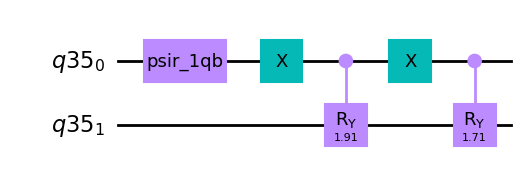

In [115]:
eigvals = [0.1, 0.2, 0.3, 0.4]
coef = np.sqrt(eigvals)
print(coef)
qc_psi_2qb_real_ = qc_psi_2qb_real(coef)
qc_psi_2qb_real_.draw('mpl')

In [116]:
sv = Statevector.from_label('00')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [117]:
sv = sv.evolve(qc_psi_2qb_real_)
sv # note o ordenamento, o 2º qb é o 1º e o 1º é o 2º (00,10,01,11)

Statevector([0.31622777+0.j, 0.54772256+0.j, 0.4472136 +0.j,
             0.63245553+0.j],
            dims=(2, 2))


## 3 qubits

Consideremos um estado misto de 3 qubits:
$$\rho = \sum_{j,k,l=0}^{1}r_{jkl}|r_{jkl}\rangle\langle r_{jkl}|.$$
Começamos com os autovalores preparando o estado puro real de 3 qubits:
$$|\psi_{r3}\rangle = \sum_{j,k,l=0}^{1}\sqrt{r_{jkl}}|jkl\rangle.$$
Este estado é preparado usando
\begin{align}
|\psi_{r3}\rangle & = C_{R_{y}(\theta_{00})}^{0_{0}1_{0}\rightarrow 2}C_{R_{y}(\theta_{01})}^{0_{0}1_{1}\rightarrow 2}C_{R_{y}(\theta_{10})}^{0_{1}1_{0}\rightarrow 2}C_{R_{y}(\theta_{11})}^{0_{1}1_{1}\rightarrow 2}\big(|\psi_{r2}\rangle_{01}\otimes|0\rangle_2\big) \\
& = \Pi_{j,k=0,1}C_{R_{y}(\theta_{jk})}^{0_{j}1_{k}\rightarrow 2}\big(|\psi_{r2}\rangle_{01}\otimes|0\rangle_2\big)
\end{align}
com
$$\theta_{jk} = 2\arctan(|\sqrt{r_{jk1}}|/|\sqrt{r_{jk0}}|)$$
e
$$|\psi_{r2}\rangle = \sum_{j,k=0}^{1}c_{jk}|jk\rangle$$
para
$$c_{jk} = \sqrt{r_{jk0}+r_{jk1}}.$$

In [145]:
def qc_ry(th):
    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr, name = 'RY')
    qc.ry(th, 0)
    return qc

In [157]:
# retorna o circuito quantico que prepara um certo estado real de 3 qubits
# coef = array com os 8 coeficientes reais do estado na base computacional
def qc_psi_3qb_real(coef):
    qr = QuantumRegister(3)
    qc = QuantumCircuit(qr, name = 'psir_3qb')
    d = len(coef)
    coef2 = np.zeros(d//2)
    th = np.zeros(d//2)
    for j in range(0,2):
        for k in range(0,2):
            coef2[int(str(j)+str(k),2)] = math.sqrt(coef[int(str(j)+str(k)+str(0),2)]**2+coef[int(str(j)+str(k)+str(1),2)]**2) 
    c_psi_2qb_real_ = qc_psi_2qb_real(coef2)
    qc.append(c_psi_2qb_real_, [qr[0],qr[1]])
    for j in range(0,2):
        for k in range(0,2):
            th[int(str(j)+str(k),2)] = 2*math.atan(np.abs(coef[int(str(j)+str(k)+str(1),2)])/np.abs(coef[int(str(j)+str(k)+str(0),2)]))
            if j == 0:
                qc.x(0)
            if k == 0:
                qc.x(1)
            qc_ry_ = qc_ry(th[int(str(j)+str(k),2)])
            ccry = qc_ry_.to_gate().control(2)
            qc.append(ccry, [0,1,2])
            if j == 0:
                qc.x(0)
            if k == 0:
                qc.x(1)
    return qc

In [197]:
list_bin = []
for j in range(0,2**3):
    b = "{:03b}".format(j)
    list_bin.append(b)
print(list_bin)

['000', '001', '010', '011', '100', '101', '110', '111']


[0.1        0.31622777 0.2        0.4472136  0.2236068  0.54772256
 0.42426407 0.34641016]


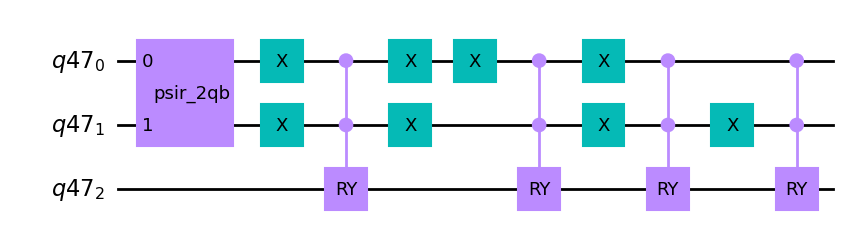

In [147]:
eigvals = [0.01,0.1,0.04,0.2,0.05,0.3,0.18,0.12]
coef = np.sqrt(eigvals)
print(coef)
qc_psi_3qb_real_ = qc_psi_3qb_real(coef)
qc_psi_3qb_real_.draw('mpl') # odernamento: '000', '001', '010', '011', '100', '101', '110', '111'

In [149]:
sv = Statevector.from_label('000')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [150]:
sv = sv.evolve(qc_psi_3qb_real_)
sv # ordenamento aqui: 000 100 010 110 001 101 011 111

Statevector([0.1       +0.j, 0.2236068 +0.j, 0.2       +0.j,
             0.42426407+0.j, 0.31622777+0.j, 0.54772256+0.j,
             0.4472136 +0.j, 0.34641016+0.j],
            dims=(2, 2, 2))


## 4 qubits

Consideremos um estado misto de 4 qubits:
$$\rho = \sum_{j,k,l,m=0}^{1}r_{jklm}|r_{jklm}\rangle\langle r_{jklm}|.$$
Começamos com os autovalores preparando o estado puro real de 4 qubits:
$$|\psi_{r4}\rangle = \sum_{j,k,l,m=0}^{1}\sqrt{r_{jklm}}|jklm\rangle.$$
Este estado é preparado usando
\begin{align}
|\psi\rangle & =  \Pi_{j,k,l=0}^{1}C_{R_y(\theta_{jkl})}^{0_{j}1_{k}2_l\rightarrow 3}\big(|\Phi\rangle_{012}\otimes|0\rangle_3\big)
\end{align}
com o uso do estado real de 3 qubits:
\begin{align}
|\Phi\rangle & = \sum_{j,k,l=0}^{1}c_{jkl}|jkl\rangle
\end{align}
em que
$$c_{jkl} = \sqrt{r_{jkl0}+r_{jkl1}}$$
e
$$\theta_{jkl} = 2\arctan(\sqrt{r_{jkl1}}/\sqrt{r_{jkl0}}).$$

In [165]:
# retorna o circuito quantico que prepara um certo estado real de 4 qubits
# coef = array com os 16 coeficientes reais do estado na base computacional
def qc_psi_4qb_real(coef):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr, name = 'psir_4qb')
    d = len(coef)
    coef3 = np.zeros(d//2)
    th = np.zeros(d//2)
    for j in range(0,2):
        for k in range(0,2):
            for l in range(0,2):
                coef3[int(str(j)+str(k)+str(l),2)] = math.sqrt(coef[int(str(j)+str(k)+str(l)+str(0),2)]**2+coef[int(str(j)+str(k)+str(l)+str(1),2)]**2) 
    c_psi_3qb_real_ = qc_psi_3qb_real(coef3)
    qc.append(c_psi_3qb_real_, [qr[0],qr[1],qr[2]])
    for j in range(0,2):
        for k in range(0,2):
            for l in range(0,2):
                th[int(str(j)+str(k)+str(l),2)] = 2*math.atan(np.abs(coef[int(str(j)+str(k)+str(l)+str(1),2)])/np.abs(coef[int(str(j)+str(k)+str(l)+str(0),2)]))
                if j == 0:
                    qc.x(0)
                if k == 0:
                    qc.x(1)
                if l == 0:
                    qc.x(2)
                qc_ry_ = qc_ry(th[int(str(j)+str(k)+str(l),2)])
                ccry = qc_ry_.to_gate().control(3)
                qc.append(ccry, [0,1,2,3])
                if j == 0:
                    qc.x(0)
                if k == 0:
                    qc.x(1)                
                if l == 0:
                    qc.x(2)
    return qc

In [198]:
list_bin = []
for j in range(0,2**4):
    b = "{:04b}".format(j)
    list_bin.append(b)
print(list_bin)

['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']


[0.08944272 0.11401754 0.13416408 0.15165751 0.16733201 0.18165902
 0.19493589 0.20736441 0.21908902 0.23021729 0.24083189 0.25099801
 0.2607681  0.27018512 0.2792848  0.59581876]


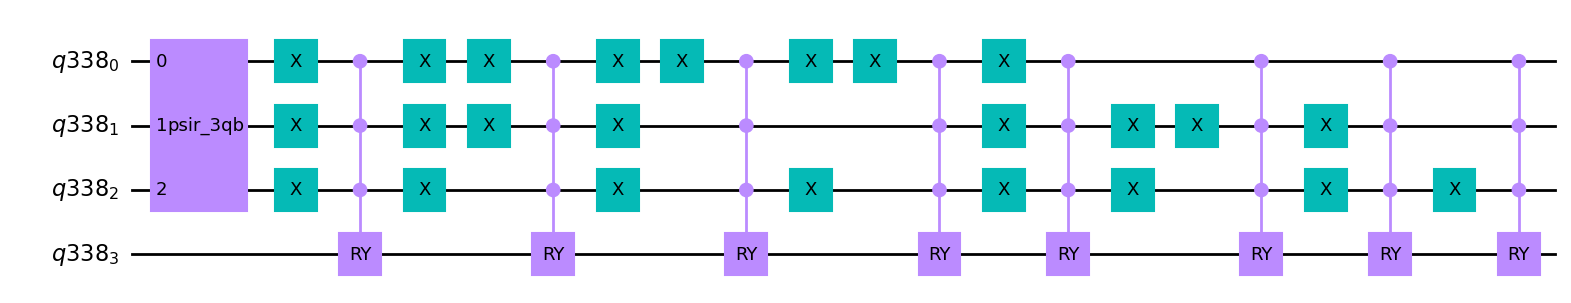

In [195]:
eigvals = np.zeros(2**4)
eigvals[0] = 0.008
for j in range(1,len(eigvals)-1):
    eigvals[j] = eigvals[j-1]+0.005
#print(np.sum(eigvals))
eigvals[j+1] = 1 - np.sum(eigvals)
#print(eigvals)
#print(np.sum(eigvals))
coef = np.sqrt(eigvals)
print(coef)
qc_psi_4qb_real_ = qc_psi_4qb_real(coef)
qc_psi_4qb_real_.draw('mpl') 
# '0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'

In [199]:
sv = Statevector.from_label('0000')
sv

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


In [200]:
sv = sv.evolve(qc_psi_4qb_real_)
sv # ordenamento aqui: 0000 1000 0100 1100 0010 1010 0110 1110 0001 1001 0101 1101 0011 1011 0111 1111

Statevector([0.08944272+0.j, 0.21908902+0.j, 0.16733201+0.j,
             0.2607681 +0.j, 0.13416408+0.j, 0.24083189+0.j,
             0.19493589+0.j, 0.2792848 +0.j, 0.11401754+0.j,
             0.23021729+0.j, 0.18165902+0.j, 0.27018512+0.j,
             0.15165751+0.j, 0.25099801+0.j, 0.20736441+0.j,
             0.59581876+0.j],
            dims=(2, 2, 2, 2))


In [202]:
sv[1]

(0.2190890230020668+0j)

# Algoritmo geral para preparação de estados mistos

<img src='fig_rho_preparation.png' width='500'>

Para 
$$\rho = \sum_{j=0}^{d-1} r_j|r_j\rangle\langle r_j|,$$
com 
$$d=2^n,$$
começamos preparando
\begin{align}
|\psi_{real}\rangle & = U|0\rangle^{\otimes n} \\
& = \sum_{j=0}^{d-1} \sqrt{r_j}|j\rangle \\
& = \sum_{j_{0},\cdots,j_{n-1}=0}^{1} \sqrt{r_{j_{0},\cdots,j_{n-1}}}|j_{0} \cdots j_{n-1}\rangle.
\end{align}

Depois se insere incerteza clássica (mistura estatística) nesse estado o correlacionando com outros $n$ qubits auxiliares
\begin{align}
|\psi_{pur}\rangle & = C_{X}^{\otimes n}|\psi_{real}\rangle|0\rangle^{\otimes n} \\
& = \sum_{j_{0},\cdots,j_{n-1}=0}^{1} \sqrt{r_{j_{0},\cdots,j_{n-1}}} C_{X}^{0\rightarrow n}|j_{0}\rangle_{0}|0\rangle_{n}\otimes\cdots\otimes C_{X}^{n-1\rightarrow 2n-1}|j_{n-1}\rangle_{n-1}|0\rangle_{2n-1} \\
& = \sum_{j_{0},\cdots,j_{n-1}=0}^{1} \sqrt{r_{j_{0},\cdots,j_{n-1}}} |j_{0}\rangle_{0}|j_0\rangle_{n}\otimes \cdots \otimes |j_{n-1}\rangle_{n-1}|j_{n-1}\rangle_{2n-1} \\
& = \sum_{j_{0},\cdots,j_{n-1}=0}^{1} \sqrt{r_{j_{0},\cdots,j_{n-1}}} |j_{0}\cdots j_{n-1}\rangle_{0,\cdots,n-1}|j_0\cdots j_{m-1}\rangle_{n-1,\cdots,2n-1} \\
& = \sum_{j=0}^{2^n -1} \sqrt{r_{j}} |j\rangle_{0,\cdots,n-1}|j\rangle_{n-1,\cdots,2n-1}.
\end{align}

Definindo
$$V|j\rangle = |r_j\rangle$$
Teremos que
\begin{align}
|\psi_{f}\rangle & = (V\otimes I)|\psi_{pur}\rangle \\
& = \sum_{j=0}^{2^n -1} \sqrt{r_{j}} V|j\rangle_{0,\cdots,n-1}|j\rangle_{n-1,\cdots,2n-1} \\
& = \sum_{j=0}^{2^n -1} \sqrt{r_{j}} |r_j\rangle_{0,\cdots,n-1}|j\rangle_{n-1,\cdots,2n-1}.
\end{align}

Assim
\begin{align}
Tr_{n-1,\cdots,2n-1}(|\psi_f\rangle\langle\psi_f|) & = \sum_{j=0}^{2^n -1} r_{j} |r_j\rangle\langle r_j|_{0,\cdots,n-1} \\
& = \rho.
\end{align}

Algoritmo
\begin{align}
& Lapack \rightarrow W = \begin{bmatrix} r_0 \\ \vdots \\ r_{d-1} \end{bmatrix},\ M = \begin{bmatrix} |r_0\rangle & \cdots & |r_{d-1}\rangle \end{bmatrix} \\
& \downarrow \\
& W \rightarrow qiskit\ state\ preparation \rightarrow U \\
& M \rightarrow qiskit\ unitary\ compilation \rightarrow V \\
& \downarrow \\
& |0\rangle^{2n} \rightarrow U \rightarrow CNOTs \rightarrow V \rightarrow state\ tomography 
\end{align}

## Preparação de estados térmicos

Estados térmicos tem a forma
$$\rho_{th} = \frac{e^{-\beta H}}{Z} = \sum_j \frac{e^{-\beta E_j}}{Z}|E_j\rangle\langle E_j| = \sum_j Pr(E_j)|E_j\rangle\langle E_j|,$$
com
$$Z = Tr(e^{-\beta H}) = \sum_j e^{-\beta E_j}.$$

### Referências

1. M. B. Pozzobom and J. Maziero, “Preparing tunable Bell-diagonal states on a quantum computer,” Quantum Inf Process, vol. 18, no. 5, p. 142, Mar. 2019, doi: 10.1007/s11128-019-2264-z.

1. E. Riedel Gårding et al., “Bell Diagonal and Werner State Generation: Entanglement, Non-Locality, Steering and Discord on the IBM Quantum Computer,” Entropy, vol. 23, no. 7, Art. no. 7, Jul. 2021, doi: 10.3390/e23070797.

1. F. Shahbeigi, M. Karimi, and V. Karimipour, “Simulating of X-states and the two-qubit XYZ Heisenberg system on IBM quantum computer,” Phys. Scr., vol. 97, no. 2, p. 025101, Feb. 2022, doi: 10.1088/1402-4896/ac49b0.

1. https://github.com/jonasmaziero/qiskit3/blob/main/01_state_preparation.ipynb

1. L. Madden and A. Simonetto, “Best Approximate Quantum Compiling Problems.” arXiv, Nov. 26, 2021. doi: 10.48550/arXiv.2106.05649.

1. “Approximate Quantum Compiler qiskit.” https://qiskit.org/documentation/apidoc/synthesis_aqc.html (accessed Mar. 16, 2023).
